Statistical Learning Method 统计学习方法 https://pypi.org/project/slmethod/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
%matplotlib inline

## 生成数据

In [2]:
# X 为样本特征，y 为样本类别输出，共 30 个样本，每个样本 2 个特
# 输出有 2 个类别，没有冗余特征，每个类别一个簇，随机状态为小武小久
X, y = make_classification(n_samples=40,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_classes=2,
                           n_clusters_per_class=1,
                           random_state=59)

## 处理 y 值，取值为范围 {-1, 1}

In [3]:
y = np.array([1 if i == 1 else -1 for i in y])

In [4]:
X

array([[ 1.26654361,  1.20833252],
       [ 2.06535223, -2.13177734],
       [ 0.11811139,  0.76083319],
       [ 0.90184139, -0.93177662],
       [ 0.96240122, -0.99933393],
       [ 0.32421018, -0.79732491],
       [ 0.16465073, -0.67426018],
       [-0.8393532 ,  0.02946355],
       [ 1.50737475, -1.62701845],
       [ 1.81169336, -1.46844229],
       [ 2.63399788,  0.97604937],
       [ 1.59518059, -1.52110826],
       [ 1.74505037,  1.46262955],
       [ 1.86201667,  0.93060442],
       [ 0.11905276, -0.52595242],
       [ 1.48508147, -0.97794231],
       [-0.92705557,  0.39367018],
       [ 3.42983834, -2.72193889],
       [ 1.99481682,  1.60244273],
       [ 2.59197055,  1.29968242],
       [ 1.60598522, -1.13518763],
       [ 1.52118196,  1.12174498],
       [ 0.13097699, -0.58481754],
       [ 0.84318571,  0.65777867],
       [ 1.0940501 , -0.02064728],
       [ 0.36579428,  1.32704784],
       [ 1.46113021,  1.11893705],
       [ 0.42126239, -0.25448586],
       [ 0.97213672,

In [5]:
y

array([ 1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1,
       -1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,
        1, -1, -1,  1,  1,  1])

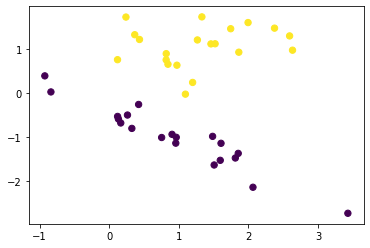

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, marker='o')

## sklearn 里面的 Perceptron

In [7]:
from sklearn.linear_model import Perceptron

In [8]:
clf = Perceptron(fit_intercept=True, max_iter=1000, shuffle=False)
clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=False, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
# Weights 权重（值）
print(clf.coef_)

[[2.06165026 2.89632885]]


In [10]:
# bias 截距
print(clf.intercept_)

[-1.]


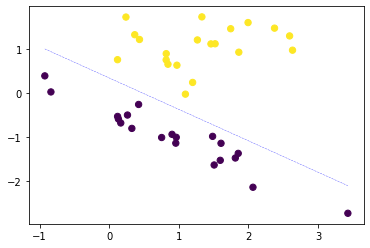

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, marker='o')

minX = np.min(X[:, 0])
maxX = np.max(X[:, 0])
x_points = np.array([minX, maxX])

sklearn_y = -(clf.coef_[0][0] * x_points + clf.intercept_) / clf.coef_[0][1]
plt.plot(x_points, sklearn_y, 'b-.', label='sklearn', linewidth=0.3)

## 原始感知机

In [12]:
from slmethod.perceptron import Perceptron

In [13]:
origin_clf = Perceptron(dual=False)
origin_clf.fit(X, y)

In [14]:
print(origin_clf.w)

[0.20616503 0.28963289]


In [15]:
print(origin_clf.b)

-0.1


## 对偶形式

In [16]:
dual_clf = Perceptron(dual=True)
dual_clf.fit(X, y)

In [17]:
print(dual_clf.w)

[0.20616503 0.28963289]


In [18]:
print(dual_clf.b)

-0.1


# 绘图

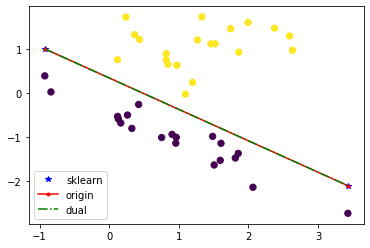

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, marker='o')
sklearn_y = -(clf.coef_[0][0] * x_points + clf.intercept_) / clf.coef_[0][1]
origin_y = -(origin_clf.w[0] * x_points + origin_clf.b) / origin_clf.w[1]
dual_y = -(dual_clf.w[0] * x_points + dual_clf.b) / dual_clf.w[1]
plt.plot(x_points, sklearn_y, 'b*', label='sklearn')
plt.plot(x_points, origin_y, 'r.-', label='origin')
plt.plot(x_points, dual_y, 'g-.', label='dual')
plt.legend()
plt.show()

从上图可以看到 sklearn，原始类型和对偶形式的线几乎重合了。